<a href="https://colab.research.google.com/github/sandraliz/Covid-19-Analysis/blob/main/Day_5_Epidemic_Modeling_Exponential_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files 
import statsmodels.api as sm
import math
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
t=np.arange(1, 140, 1)
print(t)
y=2.5**t
print(y)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139]
[2.50000000e+00 6.25000000e+00 1.56250000e+01 3.90625000e+01
 9.76562500e+01 2.44140625e+02 6.10351562e+02 1.52587891e+03
 3.81469727e+03 9.53674316e+03 2.38418579e+04 5.96046448e+04
 1.49011612e+05 3.72529030e+05 9.31322575e+05 2.32830644e+06
 5.82076609e+06 1.45519152e+07 3.63797881e+07 9.09494702e+07
 2.27373675e+08 5.68434189e+08 1.42108547e+09 3.55271368e+09
 8.88178420e+09 2.22044605e+10 5.55111512e+10 1.38777878e+11
 3.46944

Text(0.5, 1.0, 'COVID-19 Spread as exponential growth')

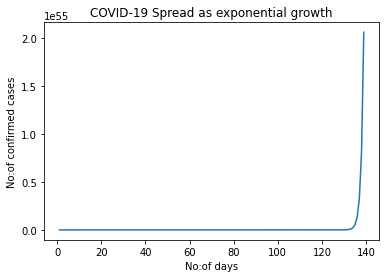

In [3]:
plt.plot(t,y)
plt.xlabel('No:of days')
plt.ylabel('No:of confirmed cases')
plt.title('COVID-19 Spread as exponential growth')

In [4]:
uploaded = files.upload()

Saving covid-india-cinfirmed.csv to covid-india-cinfirmed.csv


In [5]:
data = pd.read_csv('covid-india-cinfirmed.csv') 
data.head()
print(data)

          Date  Confirmed 
0   30-01-2020           1
1   31-01-2020           1
2   01-02-2020           1
3   02-02-2020           2
4   03-02-2020           3
5   04-02-2020           3
6   05-02-2020           3
7   06-02-2020           3
8   07-02-2020           3
9   08-02-2020           3
10  09-02-2020           3
11  10-02-2020           3
12  11-02-2020           3
13  12-02-2020           3
14  13-02-2020           3
15  14-02-2020           3
16  15-02-2020           3
17  16-02-2020           3
18  17-02-2020           3
19  18-02-2020           3
20  19-02-2020           3
21  20-02-2020           3
22  21-02-2020           3
23  22-02-2020           3
24  23-02-2020           3
25  24-02-2020           3
26  25-02-2020           3
27  26-02-2020           3
28  27-02-2020           3
29  28-02-2020           3
30  29-02-2020           3
31  01-03-2020           3
32  02-03-2020           5
33  03-03-2020           5
34  04-03-2020          28
35  05-03-2020          30
3

In [6]:
data.columns=['Date','Confirmed']
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data.head()

,Date,Confirmed
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3


In [7]:
data.shape

(53, 2)

In [9]:
x2=data.loc[0:53,'Confirmed']

Text(0.5, 1.0, 'COVID-19 Spread')

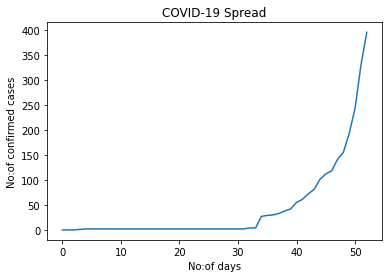

In [ ]:
plt.plot(x2)
plt.xlabel('No:of days')
plt.ylabel('No:of confirmed cases')
plt.title('COVID-19 Spread')

In [10]:
length=len(x2)
print(length)
x2['Date'] = np.arange(0,53,1)
x2['Confirmed']=data.Confirmed

53


In [11]:
data['logConfirmed']= np.log(data.Confirmed)
data.head()


,Date,Confirmed,logConfirmed
0,2020-01-30,1,0.000000
1,2020-01-31,1,0.000000
2,2020-02-01,1,0.000000
3,2020-02-02,2,0.693147
4,2020-02-03,3,1.098612


In [12]:
Xnew=x2.Date
Xnew=sm.add_constant(Xnew)

y1=data.logConfirmed

mod1=sm.OLS(y1,Xnew)
res1=mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:           logConfirmed   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.8
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           8.61e-20
Time:                        14:30:21   Log-Likelihood:                -61.097
No. Observations:                  53   AIC:                             126.2
Df Residuals:                      51   BIC:                             130.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4027      0.212     -1.903      0.0

In [13]:
print(res1.params)

const   -0.402689
x1       0.102080
dtype: float64


In [14]:
print("Growth rate = " ,res1.params.x1)

initial= np.exp(res1.params.const)
print("Initial_infected = ",initial)

Growth rate =  0.10208023727211524
Initial_infected =  0.6685198974225587


Text(0.5, 0, 'No of days')

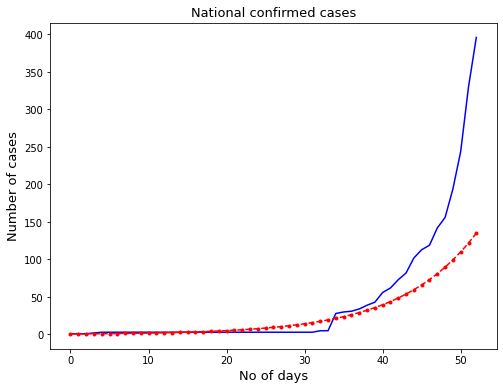

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x2.Date, x2.Confirmed, 'b-')
ax.plot(x2.Date, np.exp(res1.fittedvalues), 'r--.')
ax.set_title("National confirmed cases", size=13)
ax.set_ylabel("Number of cases", size=13)
ax.set_xlabel("No of days", size=13)